In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from transformers import AutoTokenizer, AutoModelForCausalLM
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
import seaborn as sns

/home/satvik/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('../new_csv_files/data.csv', sep=',')

In [3]:
data.head()

Pixel 0  Pixel 10 (Tree Cover)  Pixel 20 (Shrubland)  Pixel 30 (Grassland)   
0     0.00                4535.17                238.45                176.86  \
1    11.14                1924.92                943.49                824.89   
2     0.00                 214.42                297.79                271.15   
3     0.00                 475.73                429.08                 54.40   
4     0.00                 332.83                967.91                788.12   

   Pixel 40 (Cropland)  Pixel 50 (Built-up)   
0               389.13              6488.56  \
1              5037.38              2808.20   
2              5711.06              4160.53   
3              5269.83              3453.05   
4              5770.72              2877.96   

   Pixel 60 (Bare / sparse vegetation)  Pixel 70 (Snow and ice)   
0                               430.25                      0.0  \
1                               829.48                      0.0   
2                              1734.35                      0.0   
3                              1778.22                      0.0   
4                              1468.81                      0.0   

   Pixel 80 (Permanent water bodies)  Pixel 90 (Herbaceous wetland)   
0                             162.67                           0.01  \
1                              41.60                           0.00   
2                              20.65                           0.01   
3                             735.98                          33.17   
4                             203.61                           0.00   

   Pixel 95 (Mangroves)  Pixel 100 (Moss and lichen)  Road_length   
0                  0.00                          0.0  1898.331177  \
1                  0.00                          0.0  1313.717944   
2                  0.00                          0.0  1714.513607   
3                191.64                          0.0  1454.757045   
4                  0.00                          0.0  1164.130948   

   Network Density        CA  population  
0         17.513924  4054.11      249998  
1         11.084396  1534.05      488157  
2         14.574160  2377.14      483615  
3         12.764563  2141.93      479920  
4         10.106350  1608.71      479073

In [4]:
data.columns

Index(['Pixel 0', 'Pixel 10 (Tree Cover)', 'Pixel 20 (Shrubland)',
       'Pixel 30 (Grassland)', 'Pixel 40 (Cropland)', 'Pixel 50 (Built-up)',
       'Pixel 60 (Bare / sparse vegetation)', 'Pixel 70 (Snow and ice)',
       'Pixel 80 (Permanent water bodies)', 'Pixel 90 (Herbaceous wetland)',
       'Pixel 95 (Mangroves)', 'Pixel 100 (Moss and lichen)', 'Road_length',
       'Network Density ', 'CA', 'population'],
      dtype='object')

In [5]:
pd.plotting.scatter_matrix(data, figsize=(100, 100))

array([[<Axes: xlabel='Pixel 0', ylabel='Pixel 0'>,
        <Axes: xlabel='Pixel 10 (Tree Cover)', ylabel='Pixel 0'>,
        <Axes: xlabel='Pixel 20 (Shrubland)', ylabel='Pixel 0'>,
        <Axes: xlabel='Pixel 30 (Grassland)', ylabel='Pixel 0'>,
        <Axes: xlabel='Pixel 40 (Cropland)', ylabel='Pixel 0'>,
        <Axes: xlabel='Pixel 50 (Built-up)', ylabel='Pixel 0'>,
        <Axes: xlabel='Pixel 60 (Bare / sparse vegetation)', ylabel='Pixel 0'>,
        <Axes: xlabel='Pixel 70 (Snow and ice)', ylabel='Pixel 0'>,
        <Axes: xlabel='Pixel 80 (Permanent water bodies)', ylabel='Pixel 0'>,
        <Axes: xlabel='Pixel 90 (Herbaceous wetland)', ylabel='Pixel 0'>,
        <Axes: xlabel='Pixel 95 (Mangroves)', ylabel='Pixel 0'>,
        <Axes: xlabel='Pixel 100 (Moss and lichen)', ylabel='Pixel 0'>,
        <Axes: xlabel='Road_length', ylabel='Pixel 0'>,
        <Axes: xlabel='Network Density ', ylabel='Pixel 0'>,
        <Axes: xlabel='CA', ylabel='Pixel 0'>,
        <Axes: xlabel='

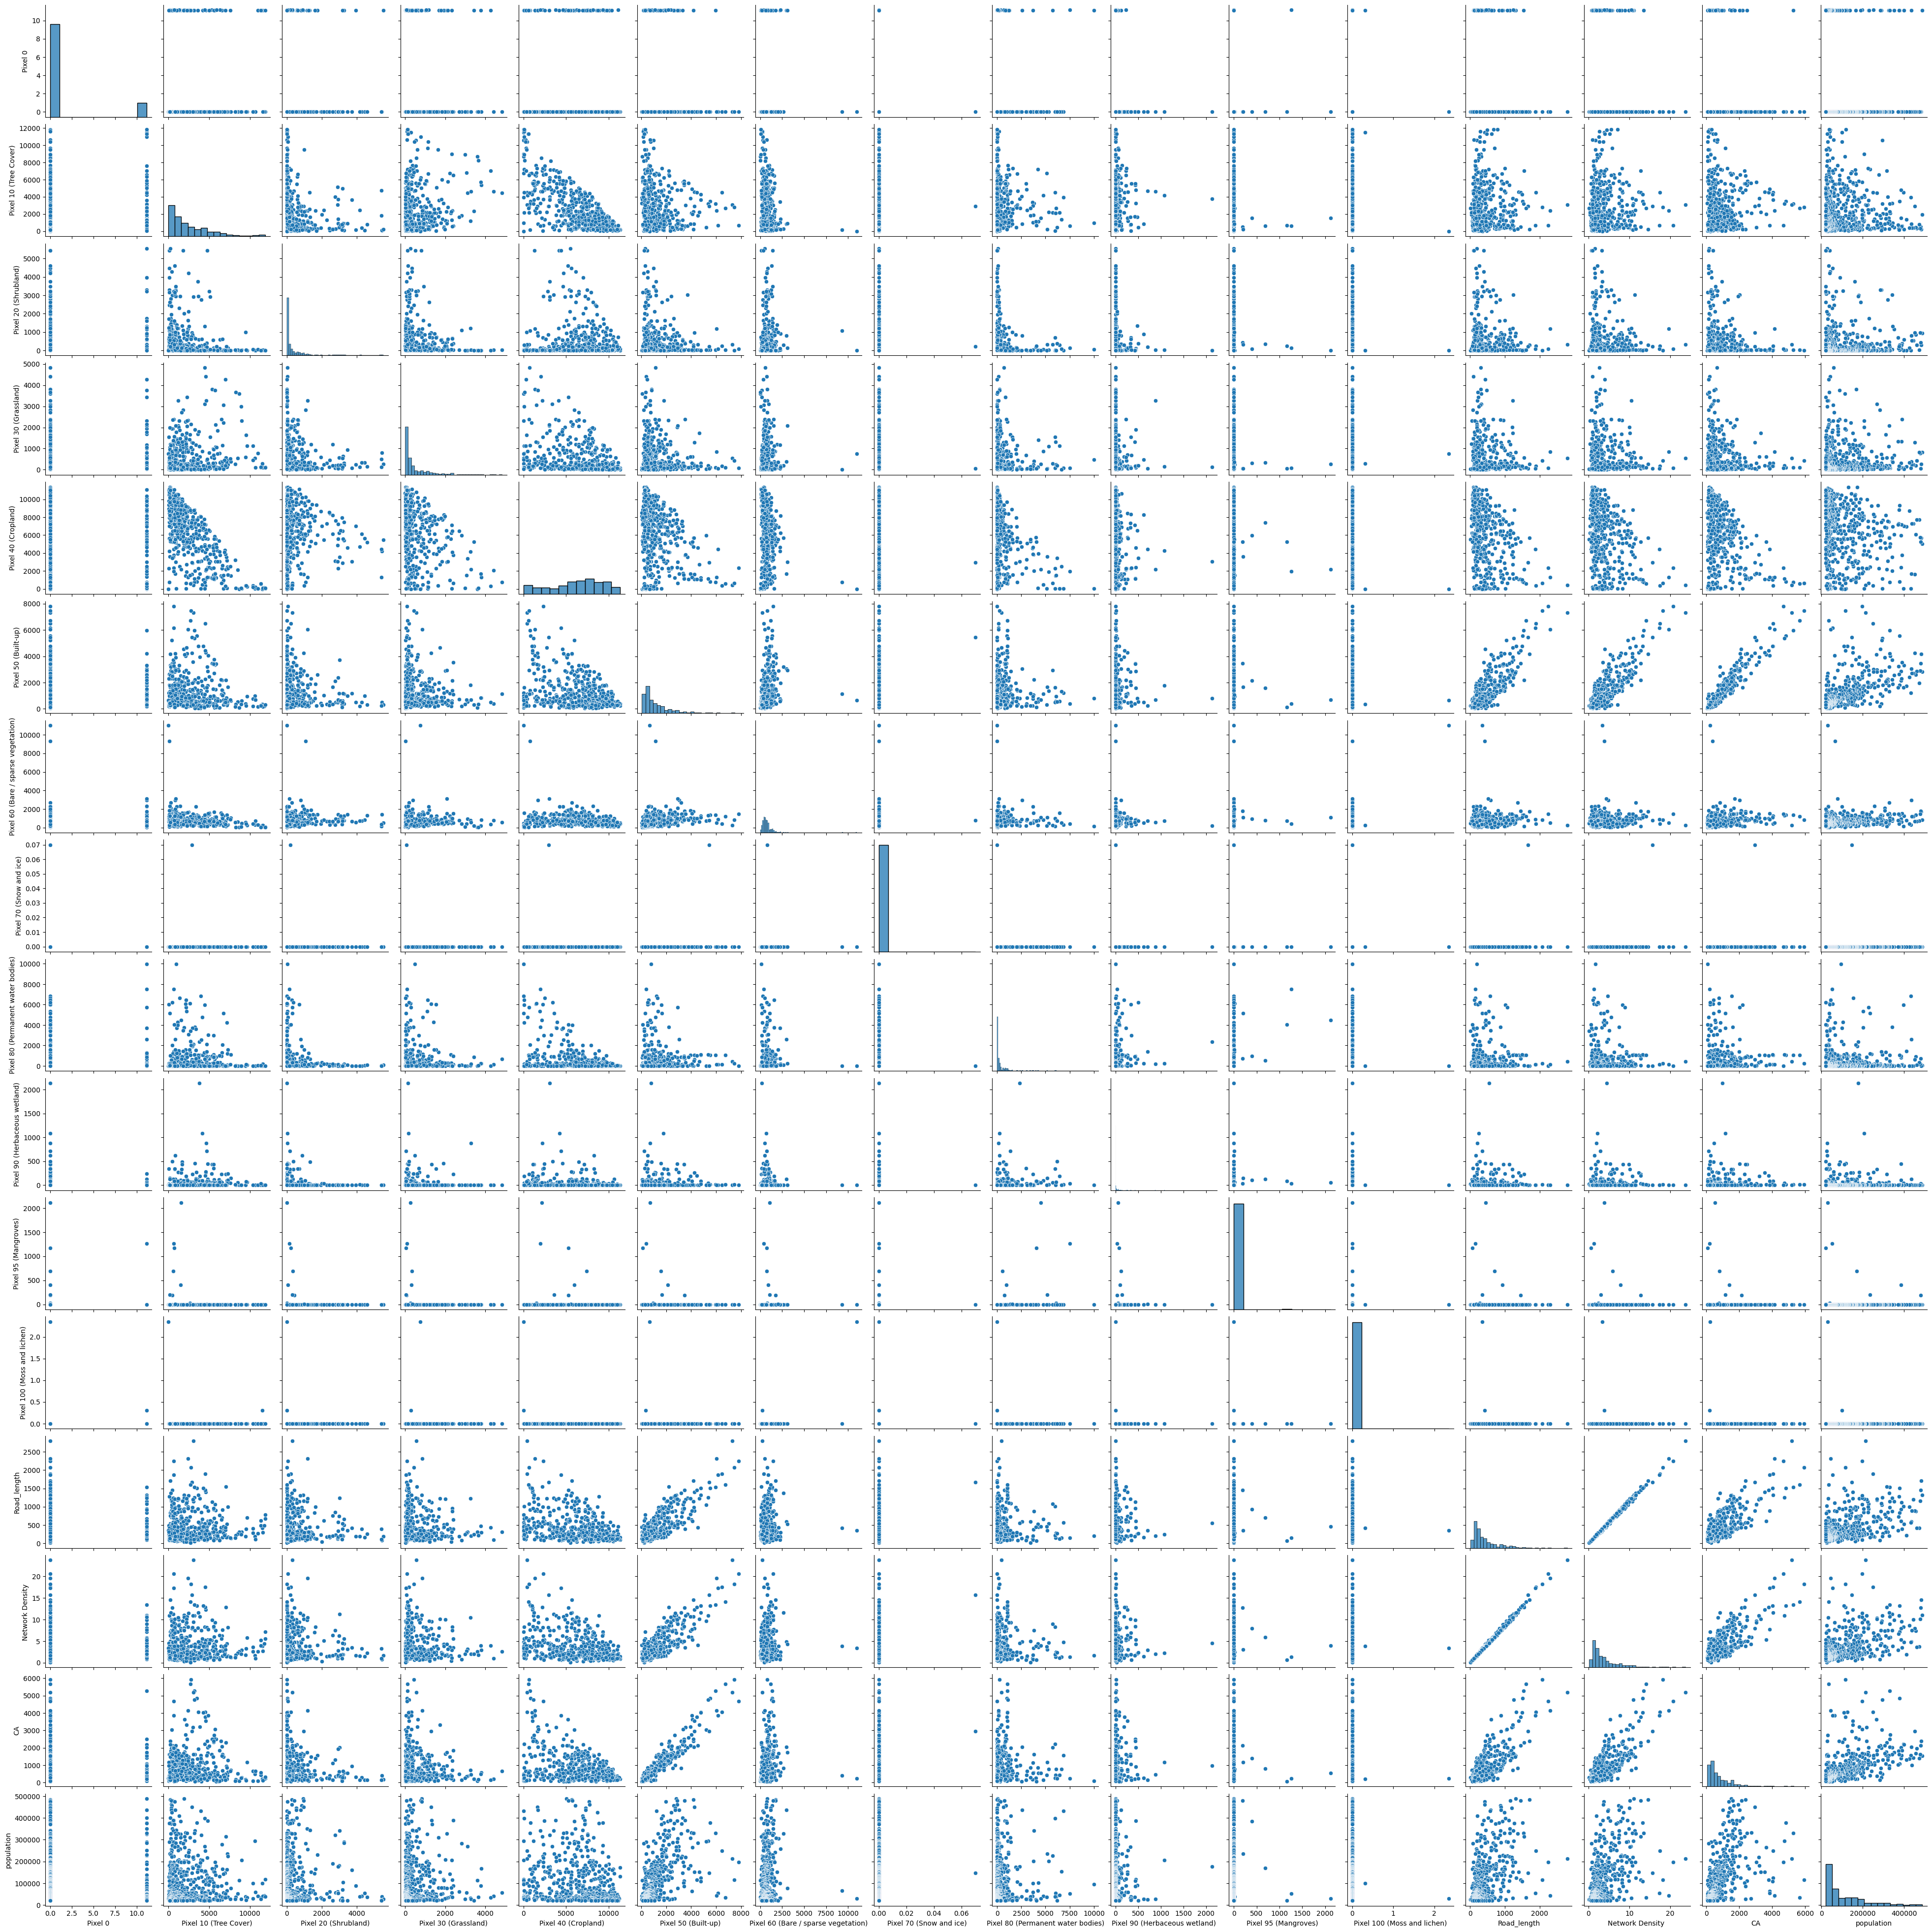

In [6]:
sns.pairplot(data)

# MODEL 1

In [7]:
X = data['Pixel 50 (Built-up)']
# X = pd.concat([X, data['Pixel 60 (Bare / sparse vegetation)']], axis=1)
y = data['Network Density ']
# print(X.shape)
X = X.to_numpy().reshape(-1, 1)
# print(np.shape(X))
y = y.to_numpy().reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
np.shape(X_train)

(402, 1)

In [9]:
np.shape(X_test)

(101, 1)

## Linear Regression

In [10]:
model = LinearRegression().fit(X_train, y_train)

In [11]:
y_train_pred = model.predict(X_train)

In [12]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [13]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.318773805232022
Test: 1.5078899539440513


### Mean Squared Error

In [14]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 3.007310782224687
Test: 4.104573634002795


### R2 Score

In [15]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.6991041395544955
Test: 0.7720848857004576


### Adj R2 Score

In [16]:
def adj_r2(r2, n, p):
    t2_1 = 1 - r2**2
    t2_2 = (n-1) / (n-p)
    t2 = t2_1 * t2_2
    return 1 - t2

In [17]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.4887465979422314
Test: 0.5961150707270887


## Ridge Regression

In [18]:
model = Ridge().fit(X_train, y_train)

In [19]:
y_train_pred = model.predict(X_train)

In [20]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [21]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.318773805658518
Test: 1.5078899548298685


### Mean Sqaured Error

In [22]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 3.0073107822246876
Test: 4.104573640474497


### R2 Score

In [23]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.6991041395544955
Test: 0.7720848853411028


### Adj R2 Score

In [24]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.4887465979422314
Test: 0.5961150701721838


## Lasso Regression

In [25]:
model = Lasso().fit(X_train, y_train)

In [26]:
y_train_pred = model.predict(X_train)

In [27]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [28]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.3188523987281107
Test: 1.5080531899390517


### Mean Squared Error

In [29]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 3.00731146331594
Test: 4.105767242504902


### R2 Score

In [30]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.6991040714080505
Test: 0.772018608069102


### Adj R2 Score

In [31]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.48874650265931263
Test: 0.5960127312049538


## Kernel Ridge

In [32]:
model = KernelRidge().fit(X_train, y_train)

In [33]:
y_train_pred = model.predict(X_train)

In [34]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [35]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.3958030824598218
Test: 1.519028871184131


### Mean Squared Error

In [36]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 3.4859122006531766
Test: 4.230155948105496


### R2 Score

In [37]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.6512177732834488
Test: 0.7651116626510259


### Adj R2 Score

In [38]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.4240845882402533
Test: 0.5853958563246173


## Decision Tree

In [39]:
model = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)

In [40]:
y_train_pred = model.predict(X_train)

In [41]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [42]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.6472816706237107
Test: 1.718005751699531


### Mean Squared Error

In [43]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.2587568427439972
Test: 5.489906856681586


### R2 Score

In [44]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.8740553435555024
Test: 0.695161334573448


### Adj R2 Score

In [45]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.7639727435979273
Test: 0.48324928108593723


## Random Forest

In [46]:
model = RandomForestRegressor(n_estimators=100, random_state=52).fit(X_train, y_train.ravel())

In [47]:
y_train_pred = model.predict(X_train)

In [48]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [49]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.6044286741686318
Test: 1.800349311159207


### Mean Squared Error

In [50]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.6392236065138125
Test: 6.201241692185627


### R2 Score

In [51]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.9360426138076867
Test: 0.6556629664613267


### Adj R2 Score

In [52]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.8761757748639262
Test: 0.42989392558886685


## SVM

In [53]:
model = SVR(kernel='linear', degree=10).fit(X_train, y_train.ravel())

In [54]:
y_train_pred = model.predict(X_train)

In [55]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [56]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.3047361355402955
Test: 1.471812194686894


### Mean Squared Error

In [57]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 3.0482484665313203
Test: 3.939358043013549


### R2 Score

In [58]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.6950081279893128
Test: 0.7812588301005388


### Adj R2 Score

In [59]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.48303629797120895
Test: 0.6103653596100624


## MLP

In [60]:
model = MLPRegressor((2, 1),  activation='logistic', solver='sgd').fit(X_train, y_train.ravel())

In [61]:
y_train_pred = model.predict(X_train)

In [62]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [63]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 2.282976095427363
Test: 2.86888676875731


### Mean Squared Error

In [64]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 10.026280230107012
Test: 18.66335016924815


### R2 Score

In [65]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: -0.0031774017961803125
Test: -0.03632190973472471


### Adj R2 Score

In [66]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 1.0095882174376847e-05
Test: 0.0013192811267774829


## Gradient Boost

In [67]:
model = GradientBoostingRegressor().fit(X_train, y_train.ravel())

In [68]:
y_train_pred = model.predict(X_train)

In [69]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [70]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.0041722378650453
Test: 1.6390472403779797


### Mean Squared Error

In [71]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.5819075093136015
Test: 4.960814293422823


### R2 Score

In [72]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.8417225702200278
Test: 0.7245403158715763


### Adj R2 Score

In [73]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.7084968852178097
Test: 0.5249586693232836


## XG Boost

In [74]:
model = xgb.XGBRegressor(n_estimators = 10, seed = 123).fit(X_train, y_train)

In [75]:
y_train_pred = model.predict(X_train)

In [76]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [77]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.001654594497459
Test: 1.6249349957482584


### Mean Squared Error

In [78]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.6428842639557855
Test: 5.273905844008852


### R2 Score

In [79]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.8356215536028955
Test: 0.7071552467021759


### Adj R2 Score

In [80]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.6982633808457167
Test: 0.5000685429384153


# MODEL 2

In [81]:
data.head()

Pixel 0  Pixel 10 (Tree Cover)  Pixel 20 (Shrubland)  Pixel 30 (Grassland)   
0     0.00                4535.17                238.45                176.86  \
1    11.14                1924.92                943.49                824.89   
2     0.00                 214.42                297.79                271.15   
3     0.00                 475.73                429.08                 54.40   
4     0.00                 332.83                967.91                788.12   

   Pixel 40 (Cropland)  Pixel 50 (Built-up)   
0               389.13              6488.56  \
1              5037.38              2808.20   
2              5711.06              4160.53   
3              5269.83              3453.05   
4              5770.72              2877.96   

   Pixel 60 (Bare / sparse vegetation)  Pixel 70 (Snow and ice)   
0                               430.25                      0.0  \
1                               829.48                      0.0   
2                              1734.35                      0.0   
3                              1778.22                      0.0   
4                              1468.81                      0.0   

   Pixel 80 (Permanent water bodies)  Pixel 90 (Herbaceous wetland)   
0                             162.67                           0.01  \
1                              41.60                           0.00   
2                              20.65                           0.01   
3                             735.98                          33.17   
4                             203.61                           0.00   

   Pixel 95 (Mangroves)  Pixel 100 (Moss and lichen)  Road_length   
0                  0.00                          0.0  1898.331177  \
1                  0.00                          0.0  1313.717944   
2                  0.00                          0.0  1714.513607   
3                191.64                          0.0  1454.757045   
4                  0.00                          0.0  1164.130948   

   Network Density        CA  population  
0         17.513924  4054.11      249998  
1         11.084396  1534.05      488157  
2         14.574160  2377.14      483615  
3         12.764563  2141.93      479920  
4         10.106350  1608.71      479073

In [82]:
X = data[['Pixel 0', 'Pixel 10 (Tree Cover)', 'Pixel 20 (Shrubland)', 'Pixel 30 (Grassland)', 'Pixel 40 (Cropland)', 'Pixel 50 (Built-up)', 'Pixel 60 (Bare / sparse vegetation)', 'Pixel 70 (Snow and ice)', 'Pixel 80 (Permanent water bodies)', 'Pixel 90 (Herbaceous wetland)', 'Pixel 95 (Mangroves)', 'Pixel 100 (Moss and lichen)']]


In [83]:
X = X.to_numpy()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regession

In [85]:
model = LinearRegression().fit(X_train, y_train)

In [86]:
y_train_pred = model.predict(X_train)

In [87]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [88]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.2321537491287813
Test: 1.428558995925279


### Mean Squared Error

In [89]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 2.7298348189176997
Test: 3.7200621042076327


### R2 Score

In [90]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.7268669398695456
Test: 0.7934356999572099


### Adj R2 Score

In [91]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.5283355482753177
Test: 0.6295402099665875


## Ridge Regression

In [92]:
model = Ridge().fit(X_train, y_train)

In [93]:
y_train_pred = model.predict(X_train)

In [94]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [95]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.2403596296567956
Test: 1.4307137113723245


### Mean Squared Error

In [96]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 2.749449618350205
Test: 3.7100955449892594


### R2 Score

In [97]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.7249043851553489
Test: 0.7939891141936146


### Adj R2 Score

In [98]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.5254863676174545
Test: 0.6304187134579607


## Lasso Regression

In [99]:
model = Lasso().fit(X_train, y_train)

In [100]:
y_train_pred = model.predict(X_train)

In [101]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [102]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.2624926368809928
Test: 1.4523620821522965


### Mean Squared Error

In [103]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 2.8158774674893707
Test: 3.775856206443698


### R2 Score

In [104]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.7182579604019061
Test: 0.7903376146693667


### Adj R2 Score

In [105]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.5158944976807062
Test: 0.6246335451612643


## Kernel Ridge

In [106]:
model = KernelRidge().fit(X_train, y_train)

In [107]:
y_train_pred = model.predict(X_train)

In [108]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [109]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.2415536903677955
Test: 1.42987433145426


### Mean Sqaured Error

In [110]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 2.750375644341092
Test: 3.7122420651303294


### R2 Score

In [111]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.7248117318157041
Test: 0.7938699241322535


### Adj R2 Score

In [112]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.5253520465776802
Test: 0.63022945644175


## Decision Tree

In [113]:
model = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)

In [114]:
y_train_pred = model.predict(X_train)

In [115]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [116]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.27100806899169455
Test: 1.8891966944400853


### Mean Squared Error

In [117]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.20681880683888404
Test: 7.419820810381739


### R2 Score

In [118]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.9793067869114404
Test: 0.5879987889433669


### Adj R2 Score

In [119]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.9590417828908092
Test: 0.34574257579886614


## Random Forest

In [120]:
model = RandomForestRegressor(n_estimators=100, random_state=52).fit(X_train, y_train.ravel())

In [121]:
y_train_pred = model.predict(X_train)

In [122]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [123]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.4532252139715173
Test: 1.484172790034455


### Mean Squared Error

In [124]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.3953315795558035
Test: 4.084676982720281


### R2 Score

In [125]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.9604451802936952
Test: 0.7731896892575594


### Adj R2 Score

In [126]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.9224549443493887
Test: 0.5978222955742012


## SVM

In [127]:
model = SVR(kernel='linear', degree=50).fit(X_train, y_train.ravel())

In [128]:
y_train_pred = model.predict(X_train)

In [129]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [130]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 4.8997975090321315
Test: 5.627244614260895


### Mean Squared Error

In [131]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 33.27324012282291
Test: 51.395274394085156


### R2 Score

In [132]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: -2.329147182174625
Test: -1.8538310875814301


### Adj R2 Score

In [133]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 5.4249265962319955
Test: 3.436689701283348


## MLP

In [134]:
model = MLPRegressor((8, 6, 2, 1),  activation='logistic', solver='sgd').fit(X_train, y_train.ravel())

In [135]:
y_train_pred = model.predict(X_train)

In [136]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [137]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 2.2766012317607176
Test: 2.8637083360433526


### Mean Squared Error

In [138]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 10.036598992815666
Test: 18.706723715541937


### R2 Score

In [139]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: -0.004209843472080754
Test: -0.03873031743856803


### Adj R2 Score

In [140]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 1.7722782059470532e-05
Test: 0.0015000374888922696


## Gradient Boost

In [141]:
model = GradientBoostingRegressor().fit(X_train, y_train.ravel())

In [142]:
y_train_pred = model.predict(X_train)

In [143]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [144]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.5681657101853987
Test: 1.4227684145410868


### Mean Squared Error

In [145]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.5307483588115801
Test: 3.9490880406439945


### R2 Score

In [146]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.9468960823575041
Test: 0.7807185514455997


### Adj R2 Score

In [147]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.8966121907839892
Test: 0.6095214565713154


## XG Boost

In [148]:
model = xgb.XGBRegressor(n_estimators = 10, seed = 123).fit(X_train, y_train)

In [149]:
y_train_pred = model.predict(X_train)

In [150]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [151]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.415857919851731
Test: 1.5770095622892193


### Mean Squared Error

In [152]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.3190583164361287
Test: 5.0671512472342375


### R2 Score

In [153]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.968076685913611
Test: 0.7186357320723185


### Adj R2 Score

In [154]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.9371724698094802
Test: 0.516437315411117


# MODEL 3

In [155]:
X = data[['Pixel 0', 'Pixel 10 (Tree Cover)', 'Pixel 20 (Shrubland)', 'Pixel 30 (Grassland)', 'Pixel 40 (Cropland)', 'Pixel 50 (Built-up)', 'Pixel 60 (Bare / sparse vegetation)', 'Pixel 80 (Permanent water bodies)', 'Pixel 90 (Herbaceous wetland)', 'Pixel 95 (Mangroves)']]


In [156]:
X = X.to_numpy()

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [158]:
model = LinearRegression().fit(X_train, y_train)

In [159]:
y_train_pred = model.predict(X_train)

In [160]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [161]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.2549307991286534
Test: 1.4594167533624332


### Mean Squared Error

In [162]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 2.795272190347391
Test: 3.827022514094381


### R2 Score

In [163]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.7203196171591661
Test: 0.7874964974434787


### Adj R2 Score

In [164]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.5188603508643277
Test: 0.6201507334857469


## Ridge Regression

In [165]:
model = Ridge().fit(X_train, y_train)

In [166]:
y_train_pred = model.predict(X_train)

In [167]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [168]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.254932323569132
Test: 1.4594133555873523


### Mean Squared Error

In [169]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 2.7952721914827285
Test: 3.827009971736898


### R2 Score

In [170]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.7203196170455701
Test: 0.7874971938843504


### Adj R2 Score

In [171]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.5188603507006768
Test: 0.6201518303757261


## Lasso Regression

In [172]:
model = Lasso().fit(X_train, y_train)

In [173]:
y_train_pred = model.predict(X_train)

In [174]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [175]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.2624926368809928
Test: 1.4523620821522967


### Mean Squared Error

In [176]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 2.8158774674893707
Test: 3.775856206443696


### R2 Score

In [177]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.7182579604019061
Test: 0.7903376146693668


### Adj R2 Score

In [178]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.5158944976807062
Test: 0.6246335451612646


## Kernel Ridge

In [179]:
model = KernelRidge().fit(X_train, y_train)

In [180]:
y_train_pred = model.predict(X_train)

In [181]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [182]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 1.2561804661889837
Test: 1.4578604103777193


### Mean Squared Error

In [183]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 2.7963038963759055
Test: 3.8295333986510234


### R2 Score

In [184]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.7202163900251394
Test: 0.7873570752789013


### Adj R2 Score

In [185]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.5187116484608437
Test: 0.6199311639917454


## Decision Tree

In [186]:
model = DecisionTreeRegressor(max_depth=15).fit(X_train, y_train)

In [187]:
y_train_pred = model.predict(X_train)

In [188]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [189]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.034385489050829186
Test: 1.8396948643937292


### Mean Squared Error

In [190]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.01412061905128798
Test: 6.532659608670417


### R2 Score

In [191]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.9985871643713798
Test: 0.6372602871450623


### Adj R2 Score

In [192]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.9971763248472731
Test: 0.40610067357220725


## Random Forest

In [193]:
model = RandomForestRegressor(n_estimators=100, random_state=52).fit(X_train, y_train.ravel())

In [194]:
y_train_pred = model.predict(X_train)

In [195]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [196]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.4583857848880597
Test: 1.4884426894747524


### Mean Squared Error

In [197]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.4024149682510671
Test: 4.089441804032317


### R2 Score

In [198]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.959736453297826
Test: 0.7729251124973928


### Adj R2 Score

In [199]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.9210940597886901
Test: 0.5974132295291074


## SVM

In [200]:
model = SVR(kernel='linear', degree=50).fit(X_train, y_train.ravel())

In [201]:
y_train_pred = model.predict(X_train)

In [202]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [203]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 3.6127259541414007
Test: 3.9590297287635012


### Mean Squared Error

In [204]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 21.805938096196506
Test: 24.348663061841073


### R2 Score

In [205]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: -1.181788641552589
Test: -0.35201090773677524


### Adj R2 Score

In [206]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 1.3966243933027134
Test: 0.12391167916566848


## MLP

In [207]:
model = MLPRegressor((8, 6, 2, 1),  activation='logistic', solver='sgd').fit(X_train, y_train.ravel())

In [208]:
y_train_pred = model.predict(X_train)

In [209]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [210]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 2.3297160492027977
Test: 2.9064263460812834


### Mean Squared Error

In [211]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 9.992074380400691
Test: 18.405142794323616


### R2 Score

In [212]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.0002450574456408505
Test: -0.021984400259588144


### Adj R2 Score

In [213]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 6.005315167367797e-08
Test: 0.000483313854773737


## Gradient Boosting

In [214]:
model = GradientBoostingRegressor().fit(X_train, y_train.ravel())

In [215]:
y_train_pred = model.predict(X_train)

In [216]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [217]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.5681657101853987
Test: 1.4178296848231942


### Mean Squared Error

In [218]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.5307483588115801
Test: 3.9484390472012874


### R2 Score

In [219]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.9468960823575041
Test: 0.7807545881762966


### Adj R2 Score

In [220]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.8966121907839892
Test: 0.6095777269583386


## XG Boost

In [221]:
model = xgb.XGBRegressor(n_estimators = 10, seed = 123).fit(X_train, y_train)

In [222]:
y_train_pred = model.predict(X_train)

In [223]:
y_test_pred = model.predict(X_test)

### Mean Absolute Error

In [224]:
train = mean_absolute_error(y_train, y_train_pred)
test = mean_absolute_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.415857919851731
Test: 1.5770095622892193


### Mean Squared Error

In [225]:
train = mean_squared_error(y_train, y_train_pred)
test = mean_squared_error(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.3190583164361287
Test: 5.0671512472342375


### R2 Score

In [226]:
train = r2_score(y_train, y_train_pred)
test = r2_score(y_test, y_test_pred)
print("Train:", train)
print("Test:", test)

Train: 0.968076685913611
Test: 0.7186357320723185


### Adj R2 Score

In [227]:
train = adj_r2(train, 402, 1)
test = adj_r2(test, 101, 1)
print("Train:", train)
print("Test:", test)

Train: 0.9371724698094802
Test: 0.516437315411117
